<a href="https://githubtocolab.com/neurallatents/neurallatents.github.io/blob/master/notebooks/dmfc_rsg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DMFC_RSG Dataset

[DANDI](https://dandiarchive.org/#/dandiset/000130)

## 1 Overview

The DMFC_RSG dataset consists of data from a single recording session of a macaque performing a time interval reproduction task, with neural activity recorded from the dorsomedial frontal cortex (DMFC). This data was provided by Hansem Sohn and Mehrdad Jazayeri from MIT, and you can find detailed descriptions of the experiment design, data collection, and their analyses of the data in their [paper](https://www.biorxiv.org/content/10.1101/465419v1.full) (Sohn et al. 2019).

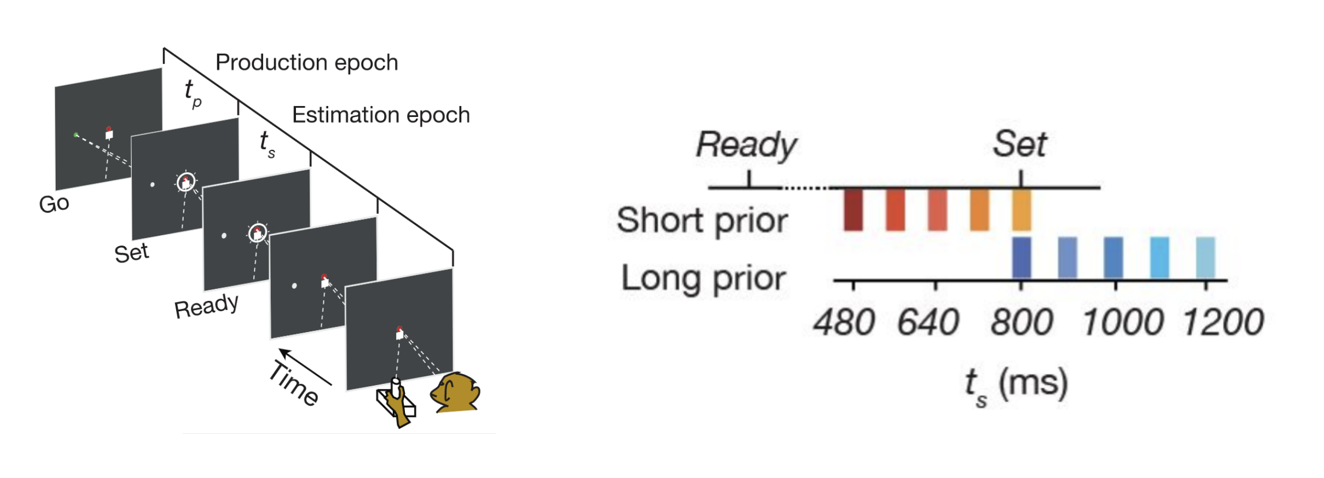

### 1.1 Task

In the ready-set-go time interval reproduction task, a monkey was presented with two visual cues ('Ready' and 'Set') separated by a time interval $t_s$, sometimes called the sampling interval. The monkey then tried to reproduce the interval $t_s$ by performing an action some time ('Go') after the 'Set' cue, resulting in a response interval $t_p$. The action could be a joystick movement or eye saccade to the right or left, and the monkey was rewarded based on how close $t_p$ was to $t_s$. In each trial, the interval $t_s$ was chosen from one of two prior distributions: a short prior containing $t_s$ values of 480, 560, 640, 720 and 800 ms, and a long prior containing 800, 900, 1000, 1100, and 1200 ms. The overlap at 800 ms allows for the examination of the effect of the monkey's learned expectations on its response. The prior and the response modality were varied in blocks of trials and indicated to the monkey by the shape and color of the fixation point on the display before the 'Ready' cue. These various parameters resulted in a total of 40 unique trial conditions.

### 1.2 Data

While the monkey performed the task, neural activity was recorded from the dorsomedial frontal cortex (DMFC), which is known to play a central role in motor timing, movement planning and learning in rodents, monkeys, and humans. The neural recording was spike sorted offline, resulting in the single-unit spike times provided in our dataset files.

## 2 Exploring the data

### 2.1 Setup

First, let's make the necessary imports and load the dataset.

In [ ]:
## Download dataset and required packages if necessary
# !pip install git+https://github.com/neurallatents/nlb_tools.git
# !pip install dandi
# !dandi download https://gui.dandiarchive.org/#/dandiset/000130

In [ ]:
## Imports

# %matplotlib widget # uncomment for interactive plots
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nlb_tools.nwb_interface import NWBDataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

In [ ]:
## Load data
dataset = NWBDataset("~/lvm/code/dandi/000130/sub-Haydn/", "*train", split_heldout=False)

### 2.2 Continuous data

For this dataset, the continuous data consists only of spike trains binned at 1 ms.

In [ ]:
## View 'dataset.data'
dataset.data

signal_type            spikes                                               \
channel                  1001 1002 1003 1004 1007 1012 1016 1017 1019 1024   
clock_time                                                                   
0 days 00:00:00           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0 days 00:00:00.001000    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0 days 00:00:00.002000    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0 days 00:00:00.003000    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0 days 00:00:00.004000    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
0 days 01:20:09.327000    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0 days 01:20:09.328000    0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
0 days 01:20:09.329000    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0 days 01:20:09.330000    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
0 days 01:20:09.331000    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

signal_type             ...                                                    
channel                 ... 3008 3036 3049 3052 3054 3086 3097 3100 3101 3103  
clock_time              ...                                                    
0 days 00:00:00         ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 00:00:00.001000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 00:00:00.002000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 00:00:00.003000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 00:00:00.004000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...                     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
0 days 01:20:09.327000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 01:20:09.328000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 01:20:09.329000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 01:20:09.330000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0 days 01:20:09.331000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[4809332 rows x 54 columns]

### 2.3 Trial metadata

The trial info dataframe has a number of fields containing information about each trial:
* `trial_id` - a number assigned to each trial during loading
* `start_time` - time when the trial begins
* `end_time` - time when the trial ends
* `fix_on_time` - time when the fixation point at the center of the display turns on. Coincides with `start_time`
* `fix_time` - time of subject fixation
* `target_on_time` - time of target presentation
* `ready_time` - time of 'ready' cue delivery
* `set_time` - time of 'set' cue delivery
* `go_time` - time of 'go' response event
* `target_acq_time` - time of target acquisition
* `reward_time` - time when the subject was rewarded, if there was a reward
* `bad_time` - time when a trial was deemed unsuccessful, if it was at all
* `is_short` - whether a trial was sampled from the short prior (True) or long prior (False)
* `is_eye` - whether a trial response involved an eye saccade (True) or hand movement (False)
* `theta` - the angle to the target in degrees, either 0 for targets on the right or 180 for the left
* `ts` - the sample interval, or the length of time between the 'ready' and 'set' cue, in ms
* `tp` - the production interval, or the length of time between the 'go' response and 'set' cue, in ms
* `fix_time_dur` - the amount of time between subject fixation and target presentation in ms
* `target_time_dur` - the amount of time between target presentation and 'ready' cue delivery in ms
* `iti` - the inter-trial interval in ms
* `reward_dur` - the duration of the reward in ms, if there was one. Reward duration was determined by how close `tp` was to `ts`
* `is_outlier` - whether the subject's `tp` is considered an outlier based on a probabilistic mixture model

In [ ]:
## View 'dataset.trial_info'
dataset.trial_info

,trial_id,start_time,end_time,fix_on_time,fix_time,target_on_time,ready_time,set_time,go_time,target_acq_time,...,is_eye,theta,ts,tp,fix_time_dur,target_time_dur,iti,reward_dur,is_outlier,split
0,0,0 days 00:00:00.516000,0 days 00:00:03.482500,0 days 00:00:00.516000,0 days 00:00:00.550000,0 days 00:00:01.083500,0 days 00:00:01.783500,0 days 00:00:02.583500,0 days 00:00:03.417000,0 days 00:00:03.417500,...,False,0.0,800.0,850.963,534.818565,689.495657,500.0,40.271583,False,train
1,1,0 days 00:00:03.999500,0 days 00:00:07.149500,0 days 00:00:03.999500,0 days 00:00:04.033500,0 days 00:00:04.633500,0 days 00:00:05.267000,0 days 00:00:06.167000,0 days 00:00:07.079500,0 days 00:00:07.080000,...,False,180.0,900.0,930.199,607.886039,632.193947,500.0,54.341259,False,train
2,2,0 days 00:00:07.666000,0 days 00:00:11.799500,0 days 00:00:07.666000,0 days 00:00:07.700000,0 days 00:00:08.600000,0 days 00:00:09.550000,0 days 00:00:10.750000,0 days 00:00:11.771500,0 days 00:00:11.771500,...,False,180.0,1200.0,1038.650,903.837023,943.257413,500.0,7.252778,False,val
3,3,0 days 00:00:12.316500,0 days 00:00:12.383000,0 days 00:00:12.316500,0 days 00:00:12.350500,NaT,NaT,NaT,NaT,NaT,...,False,0.0,1200.0,-2400.000,688.639206,943.257413,500.0,0.000700,True,none
4,4,0 days 00:00:13.916000,0 days 00:00:17.716000,0 days 00:00:13.916000,0 days 00:00:14.067000,0 days 00:00:14.933500,0 days 00:00:15.233500,0 days 00:00:16.133500,0 days 00:00:17.189500,0 days 00:00:17.189500,...,False,0.0,900.0,1073.084,866.004231,298.540437,500.0,0.000700,False,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,1155,0 days 01:19:51.381500,0 days 01:19:53.415000,0 days 01:19:51.381500,0 days 01:19:51.432500,0 days 01:19:51.982500,0 days 01:19:52.849000,NaT,NaT,NaT,...,True,180.0,900.0,-64.421,545.444910,849.090111,500.0,0.000700,True,none
1156,1156,0 days 01:19:54.949000,0 days 01:19:57.731500,0 days 01:19:54.949000,0 days 01:19:54.982500,0 days 01:19:55.582500,0 days 01:19:56.132500,0 days 01:19:56.932500,0 days 01:19:57.666000,0 days 01:19:57.671500,...,True,180.0,800.0,756.019,609.255693,537.199998,500.0,44.344417,False,train
1157,1157,0 days 01:19:58.249000,0 days 01:20:01.065000,0 days 01:19:58.249000,0 days 01:19:58.282500,0 days 01:19:58.899500,0 days 01:19:59.216000,0 days 01:20:00.116000,0 days 01:20:00.978500,0 days 01:20:00.983500,...,True,180.0,900.0,884.761,625.105868,307.792749,500.0,62.098296,False,val
1158,1158,0 days 01:20:01.581500,0 days 01:20:05.065000,0 days 01:20:01.581500,0 days 01:20:01.749500,0 days 01:20:02.266000,0 days 01:20:02.882500,0 days 01:20:03.982500,0 days 01:20:05.001500,0 days 01:20:05.006500,...,True,180.0,1100.0,1041.113,526.285915,610.483410,500.0,45.017636,False,val


### 2.4 Single-neuron responses

Individual neurons in the DMFC display a variety of complex time-dependent behaviors during both the estimation and production epoch of the ready-set-go task. Below, we'll plot PSTHs of a single neuron for each timing condition, constrained to a certain response modality and averaged across response directions. Feel free to vary the neuron plotted and the condition.

In [ ]:
## Optional resampling
# It may be beneficial to resample the data before you proceed to the analysis sections,
# as they may be fairly memory-intensive. We have not tested this notebook at bin sizes
# of over 20 ms, so we cannot guarantee that everything will work as intended at
# those larger bin sizes.
dataset.resample(5)

In [ ]:
## Helper function for computing PSTHs for a specific condition

def make_psth(dataset, field, cond_mask, start_field, end_field):
    """Computes PSTH by averaging `field` across all trials in condition"""
    # Extract trial data for trials within condition
    trial_data = dataset.make_trial_data(start_field=start_field, end_field=end_field, ignored_trials=~cond_mask)
    # Find length of shortest trial
    min_len = np.min([trial.shape[0] for _, trial in trial_data.groupby('trial_id')])
    # Average data across trials and shorten to length of shortest trial
    psth = trial_data.groupby('align_time').mean()[field].to_numpy()[:min_len] / dataset.bin_width * 1000
    return psth

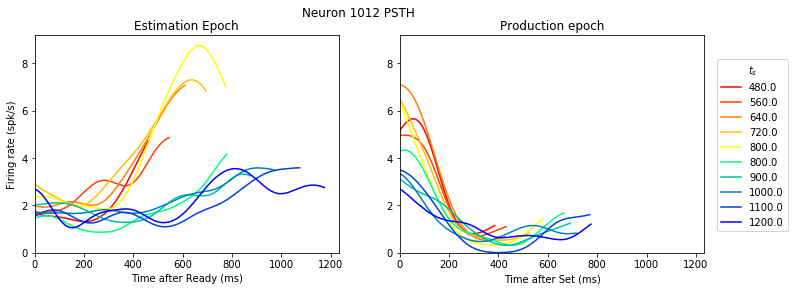

In [ ]:
## Compute and plot PSTHs

# Smooth spikes with 70 ms std Gaussian kernel
dataset.smooth_spk(70, name='smth_70')

is_eye = False # limit to joystick response trials
neur_num = 1012 # plot PSTHs for neuron 1012

# The 10 timing conditions, in the format (is_short, ts)
unique_conditions = [(True, 480.0), (True, 560.0), (True, 640.0), (True, 720.0), (True, 800.0), # short prior
                     (False, 800.0), (False, 900.0), (False, 1000.0), (False, 1100.0), (False, 1200.0)] # long prior

# Initialize plot
fig = plt.figure(figsize=(12, 4))
ax_rs = fig.add_subplot(1, 2, 1)
ax_sg = fig.add_subplot(1, 2, 2, sharex=ax_rs, sharey=ax_rs)
get_color = lambda x: plt.get_cmap('autumn')((x[1] - 480) / 320) if (x[0]) else plt.get_cmap('winter')((1200 - x[1]) / 400)

# Loop through conditions, compute and plot PSTH
for cond in unique_conditions:
    # Create boolean mask for trials in this condition
    cond_mask = (np.all(dataset.trial_info[['is_short', 'ts']] == cond, axis=1)) & \
                (dataset.trial_info.split != 'none') & (~dataset.trial_info.is_outlier) & \
                (dataset.trial_info.is_eye == is_eye)
    # Compute PSTHs
    readyset_psth = make_psth(dataset, ('spikes_smth_70', neur_num), cond_mask, 'ready_time', 'set_time')
    setgo_psth = make_psth(dataset, ('spikes_smth_70', neur_num), cond_mask, 'set_time', 'go_time')
    # Plot PSTHs
    ax_rs.plot(np.arange(0, readyset_psth.shape[0])*dataset.bin_width, readyset_psth, label=cond[1], color=get_color(cond))
    ax_sg.plot(np.arange(0, setgo_psth.shape[0])*dataset.bin_width, setgo_psth, color=get_color(cond))

# Add labels
ax_rs.set_xlim(0)
ax_rs.set_ylim(0)
ax_rs.set_xlabel('Time after Ready (ms)')
ax_sg.set_xlabel('Time after Set (ms)')
ax_rs.set_ylabel('Firing rate (spk/s)')
ax_rs.set_title('Estimation Epoch')
ax_sg.set_title('Production epoch')
fig.suptitle(f'Neuron {neur_num} PSTH')
fig.legend(title=r'$t_s$', loc='center right')
plt.show()

Neuron 1012 appears to have some sort of ramping behavior during the estimation epoch, and it quickly drops down to a steady firing rate after the 'Set' cue. Note that, despite having the same $t_s$, the two 800 ms conditions are more similar to the other conditions within their prior than to each other.

### 2.5 Neural trajectories

While the single-neuron responses are interesting, it is the activity of neural populations in the DMFC that performs the task of tracking elapsed time. To visualize this population activity, we will use PCA on the trial-averaged neural responses to project population activity onto 3-dimensional trajectories.

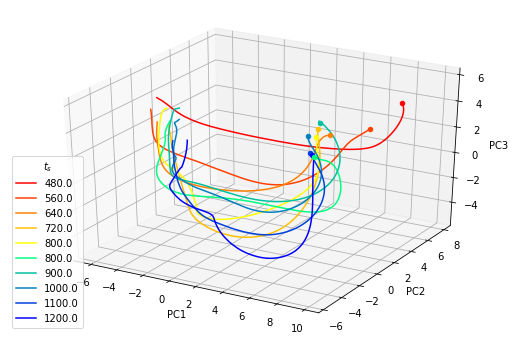

In [ ]:
## Apply PCA and plot trajectories

is_eye = True # limit to eye saccade trials
theta = 0 # limit to responses to the right

# Smooth with 50 ms Gaussian kernel (gives nice results)
dataset.smooth_spk(50, name='smth_50')

# The 10 timing conditions, in the format (id_short_trial, ts)
unique_conditions = [(True, 480.0), (True, 560.0), (True, 640.0), (True, 720.0), (True, 800.0), # short prior
                     (False, 800.0), (False, 900.0), (False, 1000.0), (False, 1100.0), (False, 1200.0)] # long prior

# Loop through conditions, averaging smoothed spikes
rate_list = []
for cond in unique_conditions:
    # Create boolean mask for trials in this condition
    cond_mask = (np.all(dataset.trial_info[['is_short', 'ts']] == cond, axis=1)) & \
                (dataset.trial_info.split != 'none') & (~dataset.trial_info.is_outlier) & \
                (dataset.trial_info.is_eye == is_eye) & (dataset.trial_info.theta == theta)
    # Compute PSTH and add to list
    setgo_psth = make_psth(dataset, 'spikes_smth_50', cond_mask, 'set_time', 'go_time')
    rate_list.append(setgo_psth)

# Save lengths of each condition
splits = np.cumsum([arr.shape[0] for arr in rate_list[:-1]])
# Apply PCA to firing rate estimates
rates_stacked = np.vstack(rate_list)
rates_scaled = StandardScaler().fit_transform(rates_stacked)
pca = PCA(n_components=3)
traj_stacked = pca.fit_transform(rates_scaled)
# Split trajectories back to one array for each condition
traj_list = np.split(traj_stacked, splits, axis=0)

# Initialize plot
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
get_color = lambda x: plt.get_cmap('autumn')((x[1] - 480) / 320) if (x[0]) else plt.get_cmap('winter')((1200 - x[1]) / 400)

# Plot each trajectory
for traj, cond in zip(traj_list, unique_conditions):
    ax.plot(traj[:, 0], traj[:, 1], traj[:, 2], label=cond[1], color=get_color(cond))
    ax.scatter(traj[0, 0], traj[0, 1], traj[0, 2], color=get_color(cond)) # mark trajectory start

# Add labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend(title=r'$t_s$', loc='lower left')
plt.show()

Trajectories for the plotted conditions are generally quite similar within each prior. The long prior conditions also appear to have longer and more winding trajectories, which makes sense considering those trajectories should take longer to reach their destination.

### 2.6 Neural speed

As you can see from the trajectories above, for this subset of conditions, the latent trajectories of neural activity seem to start and end in roughly the same areas, regardless of the timing condition. However, in the shorter conditions, the neural latent state must travel that distance in less time than in longer conditions. Thus, we might expect the latent trajectories to have a faster speed in shorter conditions. Let's see if this is the case.

In [ ]:
## Function for computing 'neural speed'

def calc_avg_speed(arr):
    """Computes average rate of change of trajectory along axis 0"""
    vel = np.gradient(arr, axis=0) # velocity for each PC
    speed = np.linalg.norm(vel, axis=1) # speed including all PCs
    avg_speed = np.mean(speed) # average across time
    return avg_speed

Text(0.5, 1.0, 'Neural speed vs Sampling interval')

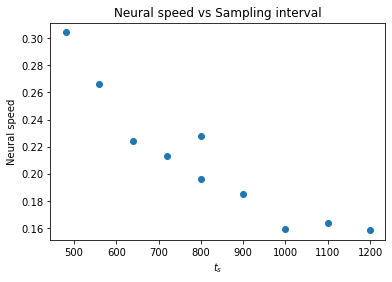

In [ ]:
## Compute and plot neural speed

# Calculate neural speeds for each condition
speed_list = [calc_avg_speed(traj) for traj in traj_list]
cond_time = [cond[1] for cond in unique_conditions]

# Plot points
plt.plot(cond_time, speed_list, marker='o', linestyle='none')
plt.xlabel(r'$t_s$')
plt.ylabel('Neural speed')
plt.title('Neural speed vs Sampling interval')

There appears to be two separate decreasing trends, possibly one for the short prior and one for the long prior. Let's plot the two priors separately with their line of best fit.

Text(0.7, 0.9, 'R = -0.859')

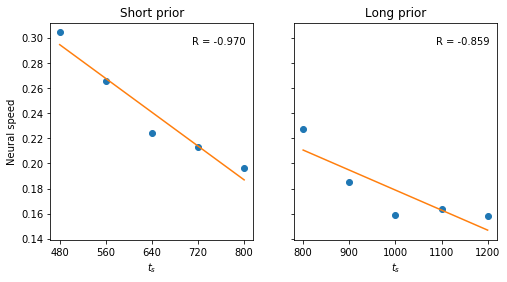

In [ ]:
## Plot neural speeds for short and long prior

# Initialize plot
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

# Calculate lines of best fit
m_short, b_short = np.polyfit(cond_time[:5], speed_list[:5], 1)
m_long, b_long = np.polyfit(cond_time[5:], speed_list[5:], 1)

# Plot points and line of best fit
axs[0].plot(cond_time[:5], speed_list[:5], marker='o', linestyle='none')
axs[0].plot(cond_time[:5], np.array(cond_time[:5]) * m_short + b_short)
axs[1].plot(cond_time[5:], speed_list[5:], marker='o', linestyle='none')
axs[1].plot(cond_time[5:], np.array(cond_time[5:]) * m_long + b_long)

# Add labels
axs[0].set_xlabel(r'$t_s$')
axs[0].set_xticks([480, 560, 640, 720, 800])
axs[1].set_xlabel(r'$t_s$')
axs[1].set_xticks([800, 900, 1000, 1100, 1200])
axs[0].set_ylabel('Neural speed')
axs[0].set_title('Short prior')
axs[1].set_title('Long prior')
axs[0].text(0.7, 0.9, f'R = {pearsonr(speed_list[:5], cond_time[:5])[0]:.3f}', transform=axs[0].transAxes)
axs[1].text(0.7, 0.9, f'R = {pearsonr(speed_list[5:], cond_time[5:])[0]:.3f}', transform=axs[1].transAxes)


Just like we predicted, neural speed is negatively correlated with the sampling interval. However, this trend only appears to hold within the short or long prior conditions. This aligns with the observation that single-neuron responses and neural trajectories are most similar within the same prior.

## 3 Summary

In this notebook, we:
* introduced the DMFC_RSG dataset, describing the task and the data collected
* looked at what specific continuous and trial data is included
* explored single-neuron responses by plotting PSTHs for various conditions
* visualized the timecourse of neural population activity by extracting condition-averaged neural trajectories with PCA
* examined the relationship between speed of neural trajectories and condition

The DMFC_RSG dataset features a complex cognitive task that provides an opportunity to explore the mechanisms of the frontal cortex. Unlike the internally-driven motor cortex and the input-driven somatosensory cortex, the DMFC is affected by a mix of internal and external factors, and successful modeling of the area would require finding a balance between inputs and internal dynamics.